# Phone Plan Revenue Analysis #

***Here, as an analyst for a telecommunications company, I have prepared an analysis for the commercial department to determine the calling plans' profitability to adjust the advertising budget.***

## Initialization ##

In [2]:
# Loading all the libraries
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from functools import reduce
%matplotlib inline



! pip install --upgrade seaborn
! pip install --upgrade matplotlib


     |████████████████████████████████| 292 kB 1.3 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
     |████████████████████████████████| 11.2 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 930 kB 80.1 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4


In [3]:
users = pd.read_csv('/datasets/megaline_users.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv') 
plans = pd.read_csv('/datasets/megaline_plans.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')




## Data Overview ##

In [4]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [5]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [6]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [7]:
plans.describe()  

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [8]:
calls.describe()  

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
users.user_id.duplicated().sum()

0

In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [12]:
messages.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [14]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [16]:
internet.head() 

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [17]:
messages.head() 

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [18]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [19]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


# Checking Null Entries #

***[churn_date] null values indicate plan is still active***

In [20]:
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [21]:
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [22]:
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [23]:
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [24]:
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

## Data Type Conversion ##

***Converting 'session date' column to datetime data type***

In [25]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')


In [26]:
internet['session_date'].dtypes

dtype('<M8[ns]')

In [27]:
internet['session_date'].head()

0   2018-12-29
1   2018-12-31
2   2018-12-28
3   2018-12-26
4   2018-12-27
Name: session_date, dtype: datetime64[ns]

In [28]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [29]:
calls['call_date'].dtypes

dtype('<M8[ns]')

In [30]:
calls['call_date'].head() 

0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
Name: call_date, dtype: datetime64[ns]

In [31]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [32]:
messages['message_date'].dtypes

dtype('<M8[ns]')

In [33]:
messages['message_date'].head() 

0   2018-12-27
1   2018-12-31
2   2018-12-31
3   2018-12-27
4   2018-12-26
Name: message_date, dtype: datetime64[ns]

## Eliminating Errors ##

In [34]:
users.duplicated().sum()

0

In [35]:
internet.duplicated().sum()

0

In [36]:
messages.duplicated().sum()

0

In [37]:
plans.duplicated().sum()

0

In [38]:
calls.duplicated().sum()

0

***Fillling missing values in 'churn_date'***

In [39]:
users['churn_date'].unique()

array([nan, '2018-12-18', '2018-11-16', '2018-09-07', '2018-12-30',
       '2018-10-07', '2018-12-31', '2018-11-24', '2018-11-11',
       '2018-12-12', '2018-11-14', '2018-12-27', '2018-11-29',
       '2018-12-22', '2018-11-30', '2018-10-13', '2018-07-31',
       '2018-12-15', '2018-12-19', '2018-10-03', '2018-10-22',
       '2018-08-16', '2018-12-26', '2018-09-01', '2018-11-21',
       '2018-08-19', '2018-12-10', '2018-09-17', '2018-11-18',
       '2018-09-18'], dtype=object)

In [40]:
 calls.query('duration == 0.0')

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


***Replacing Churn Nan Values with "Active" to denote active plan***

In [41]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [42]:
users['churn_date'] = users['churn_date'].fillna('Active')

In [43]:
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Active
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,Active
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,Active
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,Active
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,Active


***Fixing City column and Dropping 'MSA' because only one country is included in the population sample***

In [44]:
users.city.unique

<bound method Series.unique of 0          Atlanta-Sandy Springs-Roswell, GA MSA
1                Seattle-Tacoma-Bellevue, WA MSA
2           Las Vegas-Henderson-Paradise, NV MSA
3                                  Tulsa, OK MSA
4                Seattle-Tacoma-Bellevue, WA MSA
                         ...                    
495    New York-Newark-Jersey City, NY-NJ-PA MSA
496                 New Orleans-Metairie, LA MSA
497       Los Angeles-Long Beach-Anaheim, CA MSA
498    New York-Newark-Jersey City, NY-NJ-PA MSA
499            Orlando-Kissimmee-Sanford, FL MSA
Name: city, Length: 500, dtype: object>

In [45]:
users.city.value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
El Paso, TX MSA                                     1
Raleigh-Cary, NC MSA                                1
Stockton, CA MSA                                    1
Jacksonville, FL MSA                                1
Cape Coral-Fort Myers, FL MSA                       1
Name: city, Length: 73, dtype: int64

In [46]:
users['city'] = users['city'].str.replace('MSA', '')

In [47]:
users['city'] 

0          Atlanta-Sandy Springs-Roswell, GA 
1                Seattle-Tacoma-Bellevue, WA 
2           Las Vegas-Henderson-Paradise, NV 
3                                  Tulsa, OK 
4                Seattle-Tacoma-Bellevue, WA 
                        ...                  
495    New York-Newark-Jersey City, NY-NJ-PA 
496                 New Orleans-Metairie, LA 
497       Los Angeles-Long Beach-Anaheim, CA 
498    New York-Newark-Jersey City, NY-NJ-PA 
499            Orlando-Kissimmee-Sanford, FL 
Name: city, Length: 500, dtype: object

In [48]:
calls.user_id.duplicated().sum()

137254

***Creating 'Missed Calls' DF with  '0.0' Duration***

In [49]:
Missed_Calls = calls.loc[calls['duration'] == 0]

        
#calls['duration'].apply(lambda x: str(val) if type(val)!=str else val)

## The number of calls made and minutes used per month ##

In [50]:
len(calls.user_id.unique()) #some users make no phone calls   481 of 500 have values

481

In [51]:
calls.columns

Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

In [52]:
num_calls = calls.groupby(['call_date','user_id'])['user_id'].count().to_frame()

In [53]:
num_calls

user_id
call_date  user_id         
2018-01-15 1077           3
           1196           2
2018-01-16 1042           4
           1077           3
           1196           2
...                     ...
2018-12-31 1495           3
           1496           2
           1497           2
           1498           2
           1499           2

[51959 rows x 1 columns]

***Calls Made per Month***

In [54]:
calls['month'] = calls['call_date'].dt.strftime('%B')


calls['month']

0          December
1          December
2          December
3          December
4          December
            ...    
137730     November
137731      October
137732    September
137733      October
137734     December
Name: month, Length: 137735, dtype: object

In [55]:
#calls_month_pivot = calls.pivot_table(index=['user_id'], columns=['month'], values='call_date',fill_value=0, aggfunc='count') 
#calls_month_pivot


calls_month_pivot = calls.pivot_table(index=['month','user_id'], aggfunc='count').reset_index()
#calls_month_pivot = calls_month_pivot[['call_date', 'month', 'user_id']]
calls_month_pivot

,month,user_id,call_date,duration,id
0,April,1010,90,90,90
1,April,1028,7,7,7
2,April,1041,60,60,60
3,April,1042,44,44,44
4,April,1049,30,30,30
...,...,...,...,...,...
2253,September,1494,67,67,67
2254,September,1495,52,52,52
2255,September,1496,52,52,52
2256,September,1498,45,45,45


In [56]:
calls_month_pivot.describe()

,user_id,call_date,duration,id
count,2258.000000,2258.000000,2258.000000,2258.000000
mean,1247.175819,60.998671,60.998671,60.998671
std,143.344211,31.770869,31.770869,31.770869
min,1000.000000,1.000000,1.000000,1.000000
25%,1122.000000,39.000000,39.000000,39.000000
50%,1246.000000,60.000000,60.000000,60.000000
75%,1370.000000,80.000000,80.000000,80.000000
max,1499.000000,205.000000,205.000000,205.000000


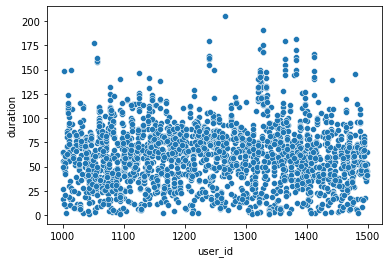

In [57]:
sns.scatterplot(data=calls_month_pivot, x="user_id", y="duration")
plt.show()

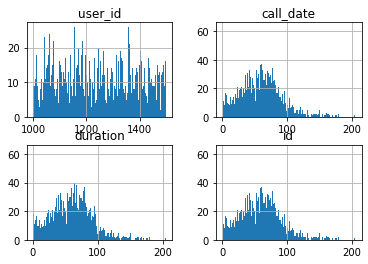

In [58]:
calls_month_pivot.hist(bins=200)
plt.show()

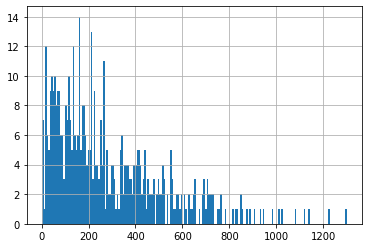

In [61]:
calls.call_date.dt.month.groupby(calls.user_id).agg('count').hist(bins=200)
plt.show()

In [62]:
calls.columns

Index(['id', 'user_id', 'call_date', 'duration', 'month'], dtype='object')

***Minutes Used per Month***

In [63]:
calls['month'] = calls['call_date'].dt.strftime('%B')


calls['month']

0          December
1          December
2          December
3          December
4          December
            ...    
137730     November
137731      October
137732    September
137733      October
137734     December
Name: month, Length: 137735, dtype: object

***Rounding up to the minute per call***

In [64]:
calls['duration'] = np.ceil(calls['duration'])

if else statement

In [65]:
calls_dur_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration',fill_value=0, aggfunc='sum').reset_index()


calls_dur_pivot

,user_id,month,duration
0,1000,December,124
1,1001,August,182
2,1001,December,412
3,1001,November,426
4,1001,October,393
...,...,...,...
2253,1498,September,363
2254,1499,December,496
2255,1499,November,308
2256,1499,October,385


In [66]:
calls_dur_pivot.describe()

,user_id,duration
count,2258.000000,2258.000000
mean,1247.175819,435.937555
std,143.344211,231.972343
min,1000.000000,0.000000
25%,1122.000000,275.000000
50%,1246.000000,429.000000
75%,1370.000000,574.750000
max,1499.000000,1510.000000


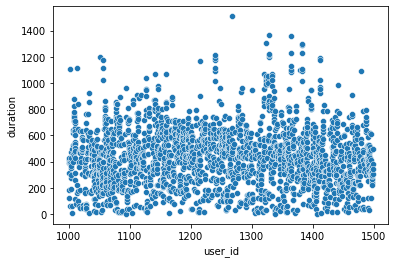

In [67]:
sns.scatterplot(data=calls_dur_pivot, x="user_id", y="duration")
plt.show()

In [71]:
min_month = calls.groupby(['month','user_id'])['duration'].sum()
min_month

month      user_id
April      1010       656.0
           1028        53.0
           1041       453.0
           1042       279.0
           1049       234.0
                      ...  
September  1494       485.0
           1495       302.0
           1496       414.0
           1498       363.0
           1499       346.0
Name: duration, Length: 2258, dtype: float64

In [72]:
min_month.to_frame()

duration
month     user_id          
April     1010        656.0
          1028         53.0
          1041        453.0
          1042        279.0
          1049        234.0
...                     ...
September 1494        485.0
          1495        302.0
          1496        414.0
          1498        363.0
          1499        346.0

[2258 rows x 1 columns]

In [73]:
#plt.figure(figsize = (10,12))
#ax = sns.boxplot(x='user_id', y='duration', data=calls, linewidth=.5, showfliers = False)

<function matplotlib.pyplot.show(close=None, block=None)>

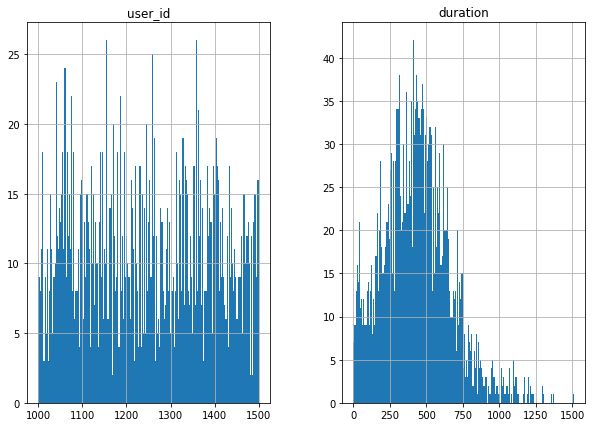

In [76]:
calls_dur_pivot.hist(bins=200, figsize = (10,7))
plt.show

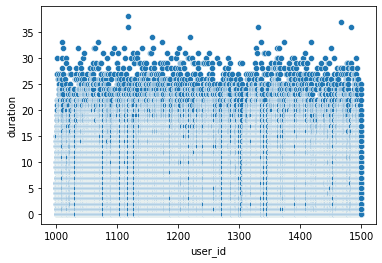

In [80]:

sns.scatterplot(data = calls, x = "user_id", y = "duration")
plt.show()


## Message Data Per Month ##

In [81]:
messages.columns

Index(['id', 'user_id', 'message_date'], dtype='object')

In [82]:
messages['month'] = messages['message_date'].dt.strftime('%B')


messages['month']

0        December
1        December
2        December
3        December
4        December
           ...   
76046    December
76047    December
76048    December
76049    December
76050    December
Name: month, Length: 76051, dtype: object

In [83]:
#msg_count_pivot = messages.pivot_table(index=['user_id'], columns=['month'], values='message_date',fill_value=0, aggfunc='count')
msg_count_pivot = messages.pivot_table(index=['user_id', 'month'], aggfunc='count').reset_index()


msg_count_pivot

,user_id,month,id,message_date
0,1000,December,11,11
1,1001,August,30,30
2,1001,December,44,44
3,1001,November,36,36
4,1001,October,53,53
...,...,...,...,...
1801,1496,December,11,11
1802,1496,November,13,13
1803,1496,October,18,18
1804,1496,September,21,21


In [84]:
msg_count_pivot.describe()

,user_id,id,message_date
count,1806.000000,1806.000000,1806.000000
mean,1245.091916,42.110188,42.110188
std,139.583315,33.122931,33.122931
min,1000.000000,1.000000,1.000000
25%,1126.250000,17.000000,17.000000
50%,1245.000000,34.000000,34.000000
75%,1362.000000,59.000000,59.000000
max,1497.000000,266.000000,266.000000


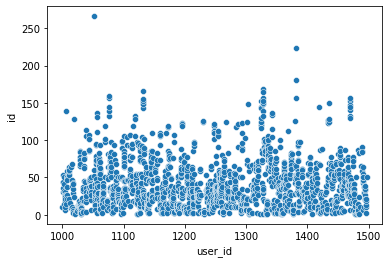

In [85]:
sns.scatterplot(data=msg_count_pivot, x="user_id", y="id")
plt.show()

In [86]:
msg_per_month = messages.message_date.dt.month.groupby(messages.user_id).agg('count')
msg_per_month

user_id
1000     11
1001    207
1002     88
1003     50
1004    177
       ... 
1491    409
1492    108
1494    174
1496     65
1497     50
Name: message_date, Length: 402, dtype: int64

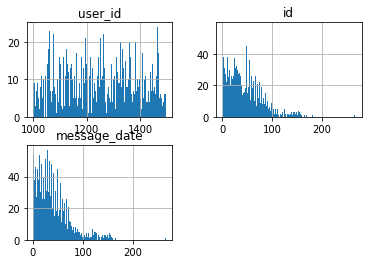

In [87]:
msg_count_pivot.hist(bins=200)
plt.show()



In [88]:
#plt.figure(figsize = (30,40))
#ax = sns.boxplot(x="message_date", y="user_id", data=messages, linewidth=.5, showfliers = False)
#plt.xticks(rotation=90)
#plt.show()

## Volume of Data Per Month ##

In [89]:
internet.columns

Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')

In [90]:
internet['month'] = internet['session_date'].dt.strftime('%B')


internet['month']

0          December
1          December
2          December
3          December
4          December
            ...    
104820      October
104821     December
104822    September
104823     December
104824     December
Name: month, Length: 104825, dtype: object

***Rounding up to the nearest 1000***

In [91]:
# Unrounded Internet Data

raw_int_data = internet.pivot_table(index=['user_id','month'], aggfunc='sum').reset_index()
raw_int_data

,user_id,month,mb_used
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49
...,...,...,...
2272,1498,September,22827.28
2273,1499,December,22059.21
2274,1499,November,16813.83
2275,1499,October,19492.43


In [92]:
raw_int_data.describe()

,user_id,mb_used
count,2277.000000,2277.000000
mean,1244.925780,16882.197501
std,142.544823,7869.784848
min,1000.000000,92.310000
25%,1121.000000,12347.720000
50%,1243.000000,16873.740000
75%,1367.000000,21041.520000
max,1499.000000,70931.590000


In [95]:
internet.loc[internet['mb_used'] <= 93] 

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,December
1,1000_204,1000,2018-12-31,0.00,December
7,1001_4,1001,2018-11-04,16.97,November
14,1001_26,1001,2018-09-17,0.00,September
16,1001_28,1001,2018-10-17,0.00,October
...,...,...,...,...,...
104797,1499_192,1499,2018-09-19,0.00,September
104804,1499_199,1499,2018-12-09,0.00,December
104816,1499_211,1499,2018-09-26,0.00,September
104817,1499_212,1499,2018-09-11,0.00,September


In [96]:
One_GB = internet.query('mb_used <= 1024')

In [97]:
Two_GB = internet.query('1024 < mb_used <= 2048')

In [98]:
internet.query('2049 < mb_used')

,id,user_id,session_date,mb_used,month


In [99]:
internet_pivot = internet.pivot_table(index=['user_id','month'], aggfunc='sum').reset_index()

internet_pivot  

,user_id,month,mb_used
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49
...,...,...,...
2272,1498,September,22827.28
2273,1499,December,22059.21
2274,1499,November,16813.83
2275,1499,October,19492.43


In [100]:
#internet_pivot = np.round(internet.pivot_table(index=['user_id','month'], aggfunc='sum'), -3).reset_index()

#internet_pivot  

***Confirming whether data was properly rounded up to the nearest 1000***

In [101]:
internet_pivot.query('mb_used <= 93')

,user_id,month,mb_used
385,1081,April,92.31
2084,1452,December,92.68


In [102]:
internet_pivot.query('mb_used <= 1000')

,user_id,month,mb_used
105,1029,August,618.95
125,1034,August,997.42
219,1053,July,855.57
349,1074,November,866.51
356,1076,July,113.74
385,1081,April,92.31
464,1099,February,599.78
506,1108,December,233.17
557,1119,November,866.29
558,1119,October,633.04


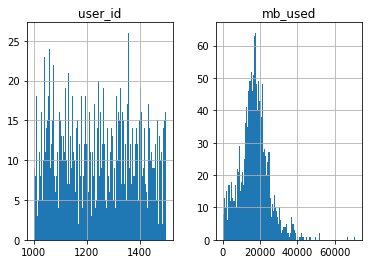

In [103]:
internet_pivot.hist(bins=200)
plt.show()



In [104]:
internet.groupby(['user_id', 'session_date'])['mb_used'].sum()

user_id  session_date
1000     2018-12-26       270.99
         2018-12-27       880.22
         2018-12-28       660.40
         2018-12-29        89.86
         2018-12-31         0.00
                          ...   
1499     2018-12-25       924.14
         2018-12-26       823.03
         2018-12-29      2385.78
         2018-12-30       304.72
         2018-12-31       192.03
Name: mb_used, Length: 49033, dtype: float64

## Monthly Revenue per User ##

In [105]:
calls_dur_pivot

,user_id,month,duration
0,1000,December,124
1,1001,August,182
2,1001,December,412
3,1001,November,426
4,1001,October,393
...,...,...,...
2253,1498,September,363
2254,1499,December,496
2255,1499,November,308
2256,1499,October,385


In [106]:
calls_month_pivot

,month,user_id,call_date,duration,id
0,April,1010,90,90,90
1,April,1028,7,7,7
2,April,1041,60,60,60
3,April,1042,44,44,44
4,April,1049,30,30,30
...,...,...,...,...,...
2253,September,1494,67,67,67
2254,September,1495,52,52,52
2255,September,1496,52,52,52
2256,September,1498,45,45,45


In [107]:
msg_count_pivot

,user_id,month,id,message_date
0,1000,December,11,11
1,1001,August,30,30
2,1001,December,44,44
3,1001,November,36,36
4,1001,October,53,53
...,...,...,...,...
1801,1496,December,11,11
1802,1496,November,13,13
1803,1496,October,18,18
1804,1496,September,21,21


In [108]:
internet_pivot

,user_id,month,mb_used
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49
...,...,...,...
2272,1498,September,22827.28
2273,1499,December,22059.21
2274,1499,November,16813.83
2275,1499,October,19492.43


In [109]:
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA",2018-12-24,ultimate,Active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,Active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV",2018-10-21,surf,Active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK",2018-01-28,surf,Active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA",2018-05-23,surf,Active
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA",2018-09-04,surf,Active
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA",2018-02-20,surf,Active
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA",2018-12-10,ultimate,Active
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA",2018-02-04,surf,Active


In [110]:
consolidated = [calls_dur_pivot, calls_month_pivot, msg_count_pivot, internet_pivot]

### Aggragated Column Name Disambuguation ###

calls_dur_pivot = total call duration duration per month ['duration_x']
calls_month_pivot = number of calls per month ['call_date'] or ['duration_y'] or [id_x]
msg_count_pivot = number of messages per month ['id_y'] or ['message_date']
internet_pivot = number of megabytes used per month ['mb_used']

### Merging Dataframes ###

In [111]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), consolidated)

In [112]:
df_merged

,user_id,month,duration_x,call_date,duration_y,id_x,id_y,message_date,mb_used
0,1000,December,124.0,16.0,16.0,16.0,11.0,11.0,1901.47
1,1001,August,182.0,27.0,27.0,27.0,30.0,30.0,6919.15
2,1001,December,412.0,56.0,56.0,56.0,44.0,44.0,19369.18
3,1001,November,426.0,64.0,64.0,64.0,36.0,36.0,18504.30
4,1001,October,393.0,65.0,65.0,65.0,53.0,53.0,22330.49
...,...,...,...,...,...,...,...,...,...
2288,1349,October,NaN,NaN,NaN,NaN,76.0,76.0,13093.55
2289,1361,May,NaN,NaN,NaN,NaN,2.0,2.0,1519.69
2290,1482,October,NaN,NaN,NaN,NaN,2.0,2.0,NaN
2291,1108,December,NaN,NaN,NaN,NaN,NaN,NaN,233.17


In [114]:
final = pd.merge(df_merged, users, how='outer', on=['user_id'])

In [117]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [118]:
final.head()

,user_id,month,duration_x,call_date,duration_y,id_x,id_y,message_date,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,December,124.0,16.0,16.0,16.0,11.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA",2018-12-24,ultimate,Active
1,1001,August,182.0,27.0,27.0,27.0,30.0,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,Active
2,1001,December,412.0,56.0,56.0,56.0,44.0,44.0,19369.18,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,Active
3,1001,November,426.0,64.0,64.0,64.0,36.0,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,Active
4,1001,October,393.0,65.0,65.0,65.0,53.0,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,Active


In [119]:
#df_merged.head()

In [120]:
#df_merged.query('duration > 1000')

# Simplifying revenue calculations  #

In [121]:
final['surf_call_rev'] = np.where(final.duration_x > 500, ((final.duration_x - 500) * 0.03), 0)
final['ult_call_rev'] = np.where(final.duration_x > 3000, ((final.duration_x - 3000) * 0.01), 0)

final['surf_msg_rev'] = np.where(final.message_date > 50, ((final.message_date - 50) * 0.03), 0)
final['ult_msg_rev'] = np.where(final.message_date > 1000, ((final.message_date - 1000) * 0.01), 0)

final['surf_int_rev'] = np.where(final.mb_used > 15000, ((final.mb_used - 15000) * 10), 0)
final['ult_int_rev'] = np.where(final.mb_used > 30000, ((final.mb_used - 30000) * 7), 0)

In [122]:
final['total_surf_revenue'] = np.where(final.plan == 'surf', 20 + final['surf_call_rev'] + final['surf_msg_rev'] + final['surf_int_rev'], 0)
final['total_ult_revenue'] = np.where(final.plan == 'ultimate', 70 + final['ult_call_rev'] + final['ult_msg_rev'] + final['ult_int_rev'], 0) 

 

In [123]:
final

,user_id,month,duration_x,call_date,duration_y,id_x,id_y,message_date,mb_used,first_name,...,plan,churn_date,surf_call_rev,ult_call_rev,surf_msg_rev,ult_msg_rev,surf_int_rev,ult_int_rev,total_surf_revenue,total_ult_revenue
0,1000,December,124.0,16.0,16.0,16.0,11.0,11.0,1901.47,Anamaria,...,ultimate,Active,0.0,0.0,0.00,0.0,0.0,0.0,0.00,70.0
1,1001,August,182.0,27.0,27.0,27.0,30.0,30.0,6919.15,Mickey,...,surf,Active,0.0,0.0,0.00,0.0,0.0,0.0,20.00,0.0
2,1001,December,412.0,56.0,56.0,56.0,44.0,44.0,19369.18,Mickey,...,surf,Active,0.0,0.0,0.00,0.0,43691.8,0.0,43711.80,0.0
3,1001,November,426.0,64.0,64.0,64.0,36.0,36.0,18504.30,Mickey,...,surf,Active,0.0,0.0,0.00,0.0,35043.0,0.0,35063.00,0.0
4,1001,October,393.0,65.0,65.0,65.0,53.0,53.0,22330.49,Mickey,...,surf,Active,0.0,0.0,0.09,0.0,73304.9,0.0,73324.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kristopher,...,surf,Active,0.0,0.0,0.00,0.0,0.0,0.0,20.00,0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eliseo,...,surf,Active,0.0,0.0,0.00,0.0,0.0,0.0,20.00,0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mckinley,...,surf,Active,0.0,0.0,0.00,0.0,0.0,0.0,20.00,0.0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dinorah,...,ultimate,Active,0.0,0.0,0.00,0.0,0.0,0.0,0.00,70.0


In [128]:
final['total_surf_revenue'].value_counts()

0.00        724
20.00       419
20.42         7
20.60         6
20.03         5
           ... 
21.98         1
41742.70      1
1526.60       1
73109.30      1
49228.50      1
Name: total_surf_revenue, Length: 1096, dtype: int64

In [129]:
final['total_ult_revenue'].value_counts()

0.00         1579
70.00         678
2672.46         1
2680.65         1
35151.97        1
15414.56        1
18408.32        1
90738.13        1
7797.16         1
57167.74        1
33944.61        1
23663.71        1
113578.57       1
36516.76        1
9360.47         1
3913.70         1
21542.50        1
26576.97        1
53179.21        1
47375.30        1
1258.88         1
105212.17       1
65283.61        1
54401.13        1
3527.02         1
55419.98        1
49049.21        1
25884.11        1
116237.31       1
18088.42        1
7722.47         1
61856.90        1
43100.33        1
47180.35        1
47002.97        1
14901.74        1
55692.28        1
72787.47        1
6796.65         1
30220.12        1
5927.67         1
42497.28        1
60157.72        1
20424.81        1
59323.74        1
53292.82        1
35700.14        1
25075.82        1
Name: total_ult_revenue, dtype: int64

#### Data Analysis #

In [130]:
group_1 = final.groupby(['plan', 'city'])['month']

group_1

In [131]:
Ult = final.query('plan == "ultimate"')

In [132]:
Surf = final.query('plan == "surf"')

# ***Monthly Call Duration*** #

**Analysis:** According to the call duration sample of the dataframe, the median and mean call duration is 429 and 436 minutes, respectively. The mean call duration is greater than the median, which tends to indicate the data set is typified by a slight positive skew. However, the outlier duration values are distorting the skew, which would tend to be more symmetrical absent the outliers, as visually represented in the histogram.  One standard deviation is σ231.972343.


Here, there are 579 users under the "Ultimate" plan whose median and mean call duration is 442 and about 443 minutes per month, respectively; one standard deviation is σ249.576439. Under the "Surf" plan there are 1180 users whose median and mean call duration is 439 and about 446 minutes, respectively; one standrard deviation is σ235.205044.

Consequently, the numbers tend to show that, although the mean "Surf" plan users' call duration is slightly longer, and the median "Surf' plan is slighly less than the "Ultimate" plan users' duration; nevertheless, these differences may be de minimus because a samples that are more commensurate wmay yield even less variation in call duration habits. That is, there are about twise as many "Surf" users than "Ultimate" plan users.



# **Duration Both Plans** #

In [133]:
calls_dur_pivot.duration.describe()

count    2258.000000
mean      435.937555
std       231.972343
min         0.000000
25%       275.000000
50%       429.000000
75%       574.750000
max      1510.000000
Name: duration, dtype: float64

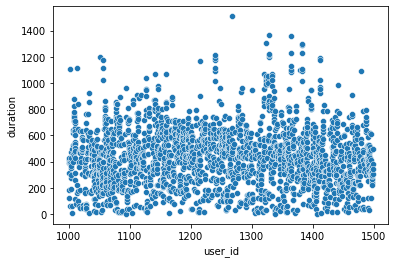

In [134]:
sns.scatterplot(data=calls_dur_pivot, x="user_id", y="duration")
plt.show()

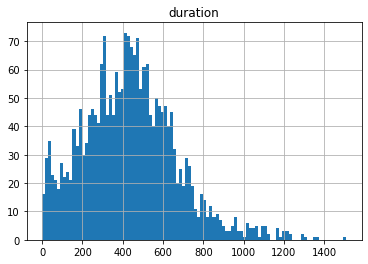

In [135]:
calls_dur_pivot.hist(column='duration', bins=100)
plt.show()

**Dataframe of Ultimate** 

In [136]:
Ult.describe()

,user_id,duration_x,call_date,duration_y,id_x,id_y,message_date,mb_used,age,surf_call_rev,ult_call_rev,surf_msg_rev,ult_msg_rev,surf_int_rev,ult_int_rev,total_surf_revenue,total_ult_revenue
count,724.000000,713.000000,713.000000,713.000000,713.000000,584.000000,584.000000,719.000000,724.000000,724.000000,724.0,724.000000,724.0,724.000000,724.000000,724.0,724.000000
mean,1253.356354,434.676017,61.221599,61.221599,61.221599,46.296233,46.296233,17238.642253,47.685083,1.912334,0.0,0.282265,0.0,41206.594613,2459.234682,0.0,2529.234682
std,150.941802,237.852123,32.855296,32.855296,32.855296,32.942118,32.942118,7831.018323,16.793440,4.064630,0.0,0.587648,0.0,57470.201299,11949.802309,0.0,11949.802309
min,1000.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,233.170000,18.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,70.000000
25%,1126.000000,263.000000,37.000000,37.000000,37.000000,21.000000,21.000000,12671.130000,34.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,70.000000
50%,1246.000000,425.000000,61.000000,61.000000,61.000000,41.000000,41.000000,16863.450000,48.000000,0.000000,0.0,0.000000,0.0,17967.400000,0.000000,0.0,70.000000
75%,1401.000000,566.000000,80.000000,80.000000,80.000000,66.000000,66.000000,21025.155000,64.000000,1.927500,0.0,0.307500,0.0,59666.625000,0.000000,0.0,70.000000
max,1497.000000,1369.000000,191.000000,191.000000,191.000000,166.000000,166.000000,46595.330000,75.000000,26.070000,0.0,3.480000,0.0,315953.300000,116167.310000,0.0,116237.310000


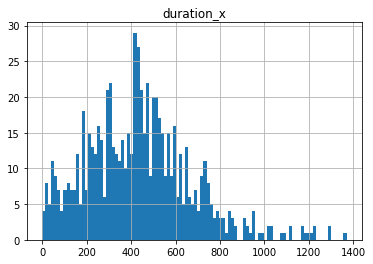

In [137]:
Ult.hist(column='duration_x', bins=100)
plt.show()

**Dataframe of Surf**

In [138]:
Surf.describe()

,user_id,duration_x,call_date,duration_y,id_x,id_y,message_date,mb_used,age,surf_call_rev,ult_call_rev,surf_msg_rev,ult_msg_rev,surf_int_rev,ult_int_rev,total_surf_revenue,total_ult_revenue
count,1579.000000,1545.000000,1545.000000,1545.000000,1545.000000,1222.000000,1222.000000,1558.000000,1579.000000,1579.000000,1579.0,1579.000000,1579.0,1579.000000,1579.000000,1579.000000,1579.0
mean,1242.940469,436.519741,60.895793,60.895793,60.895793,40.109656,40.109656,16717.702137,44.382521,1.836764,0.0,0.209582,0.0,38451.079037,2052.469512,38473.125383,0.0
std,139.200115,229.283805,31.268044,31.268044,31.268044,33.035500,33.035500,7884.682983,16.669207,3.760291,0.0,0.583159,0.0,55155.535462,14412.729694,55156.336406,0.0
min,1001.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,92.310000,18.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,20.000000,0.0
25%,1120.000000,279.000000,40.000000,40.000000,40.000000,16.000000,16.000000,12187.955000,29.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,20.000000,0.0
50%,1245.000000,430.000000,60.000000,60.000000,60.000000,32.000000,32.000000,16923.830000,45.000000,0.000000,0.0,0.000000,0.0,18137.300000,0.000000,18158.300000,0.0
75%,1358.000000,579.000000,80.000000,80.000000,80.000000,54.000000,54.000000,21039.860000,60.000000,2.280000,0.0,0.000000,0.0,59930.750000,0.000000,59950.750000,0.0
max,1499.000000,1510.000000,205.000000,205.000000,205.000000,266.000000,266.000000,70931.590000,75.000000,30.300000,0.0,6.480000,0.0,559315.900000,286521.130000,559356.270000,0.0


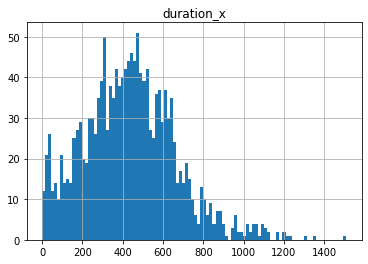

In [139]:
Surf.hist(column='duration_x', bins=100)
plt.show()

**Analysis:** Here, a boxplot representation of the mean and median tends to show a more symmetrcial distribution.  

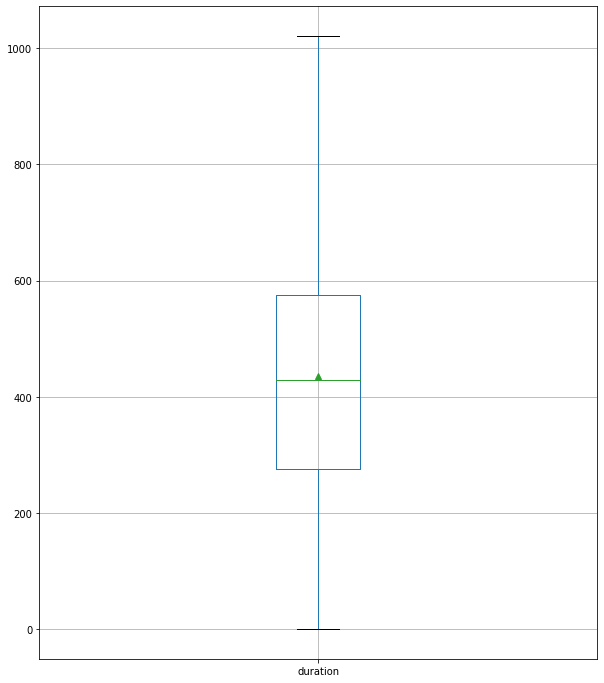

In [140]:
plt.figure(figsize = (10,12))
calls_dur_pivot.boxplot(column='duration', showmeans=True, showfliers=False)
plt.show()

# Calls Per Month Both Plans #

**Analysis:** According to the call duration sample of the dataframe, the median and mean number of calls per month is 60 and 61 calls, respectively. The mean call duration is slightly greater than the median, but the presence of outliers  tends to indicate the data set is typified by a slight negative skew. However, the outlier duration values are distorting the skew.  One standard deviation is σ32.314360.

In [141]:
calls_month_pivot.describe()

,user_id,call_date,duration,id
count,2258.000000,2258.000000,2258.000000,2258.000000
mean,1247.175819,60.998671,60.998671,60.998671
std,143.344211,31.770869,31.770869,31.770869
min,1000.000000,1.000000,1.000000,1.000000
25%,1122.000000,39.000000,39.000000,39.000000
50%,1246.000000,60.000000,60.000000,60.000000
75%,1370.000000,80.000000,80.000000,80.000000
max,1499.000000,205.000000,205.000000,205.000000


In [144]:
len(final['call_date'].isna())

2303

In [145]:
final['call_date'] = final['call_date'].fillna(0)

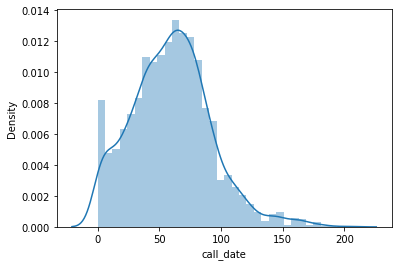

In [148]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(final.call_date)
plt.show()

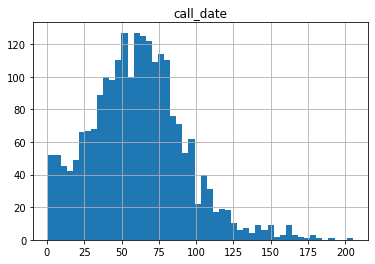

In [149]:
calls_month_pivot.hist(column='call_date', bins=50)
plt.show()

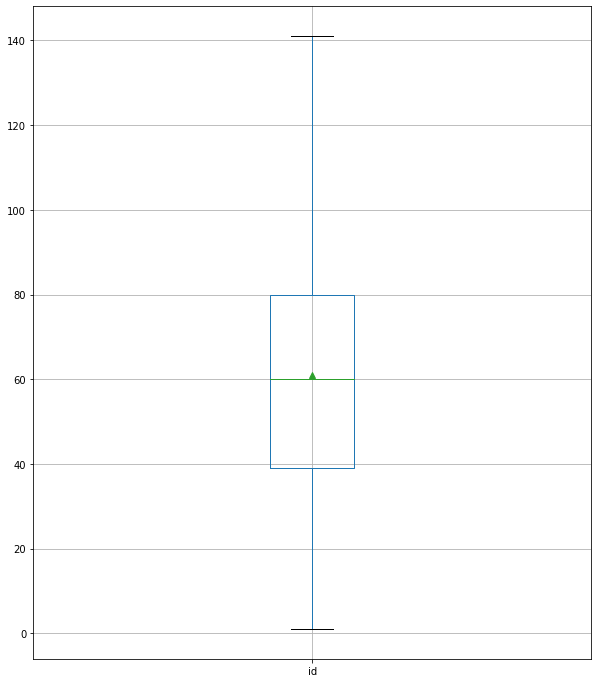

In [150]:
plt.figure(figsize = (10,12))
calls_month_pivot.boxplot(column='id', showmeans=True, showfliers=False)
plt.show()


# 'Surf' Calls Per Month #

**Analysis:** According to the call number sample of "Surf Users, the median and mean number of calls per month is 61 and about 62 calls per month, respectively. The mean call duration is slightly greater than the median, but the presence of outliers  tends to indicate the data set is typified by a slight negative skew. However, the outlier duration values are distorting the skew.  One standard deviation is σ31.770869.

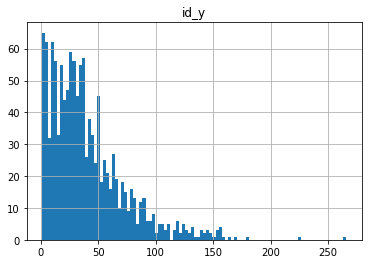

In [151]:
#calls_month_ult = final.where([final.plan == 'surf']).pivot_table(index=['month','user_id'], values='user_id', aggfunc='count')

calls_month_surf = pd.pivot_table(final[final.plan == 'surf'], index=['month','user_id'], values='id_y').reset_index()
calls_month_surf.hist(column='id_y', bins=100)
plt.show()


# **Ultimate Calls Per Month** #

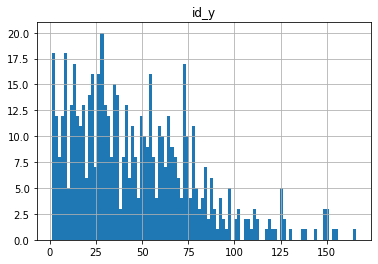

In [152]:
calls_month_ult = pd.pivot_table(final[final.plan == 'ultimate'], index=['month','user_id'], values='id_y').reset_index()
calls_month_ult.hist(column='id_y', bins=100)
plt.show()

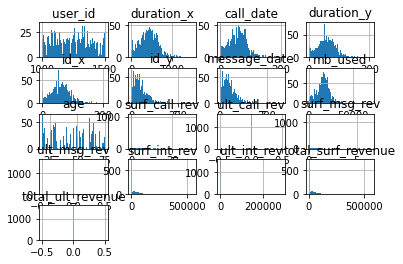

In [153]:
final[final.plan == 'surf'].hist(bins=100)
plt.show()

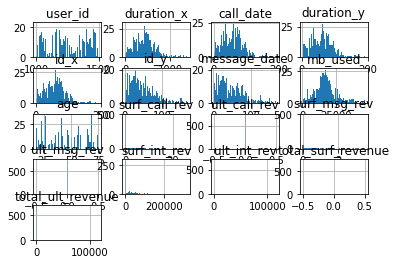

In [154]:
final[final.plan == 'ultimate'].hist(bins=100)
plt.show()

# ***Messages Per Month***  #

**Analysis:** According to the text message sample of the dataframe, the median and mean message count is 34 and about 42 messages, respectively. ***In toto***, the mean message count is greater than the median, which tends to indicate the data set is typified by a discernible positive skew. Here, the outlier message count values tend to skew the data whereby the mean is greater than the median but overall the dataset is negatively skewed.  One standard deviation is σ33.122931.


Here, there are 579 users under the "**Ultimate**" plan whose median and mean message count is 41 and about 46 messages per month, respectively; one standard deviation is σ32.930135. Under the "**Surf**" plan there are 1180 users whose median and mean message count is 32 and about 40 messages per month, respectively; one standrard deviation is σ32.314360.

Consequently, the numbers tend to show that,  the median and mean "Surf" plan users' message count is slightly lower than median and mean  "Ultimate" plan users' message count. As stated before, these differences may be de minimus because a samples that are more commensurate may yield even less variation in text messaging habits, given there are twice as many "Surf" users as "Ultimate" plan users.

# Both Plans #

In [155]:
msg_count_pivot.describe()

,user_id,id,message_date
count,1806.000000,1806.000000,1806.000000
mean,1245.091916,42.110188,42.110188
std,139.583315,33.122931,33.122931
min,1000.000000,1.000000,1.000000
25%,1126.250000,17.000000,17.000000
50%,1245.000000,34.000000,34.000000
75%,1362.000000,59.000000,59.000000
max,1497.000000,266.000000,266.000000


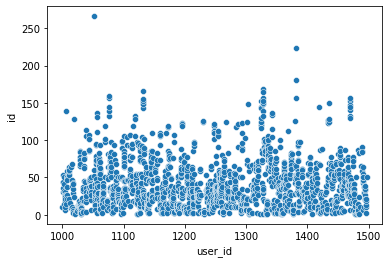

In [156]:
sns.scatterplot(data=msg_count_pivot, x="user_id", y="id")
plt.show()

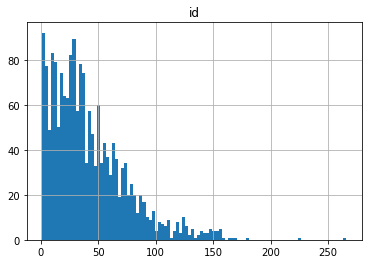

In [157]:
msg_count_pivot.hist(column='id', bins=100)
plt.show()

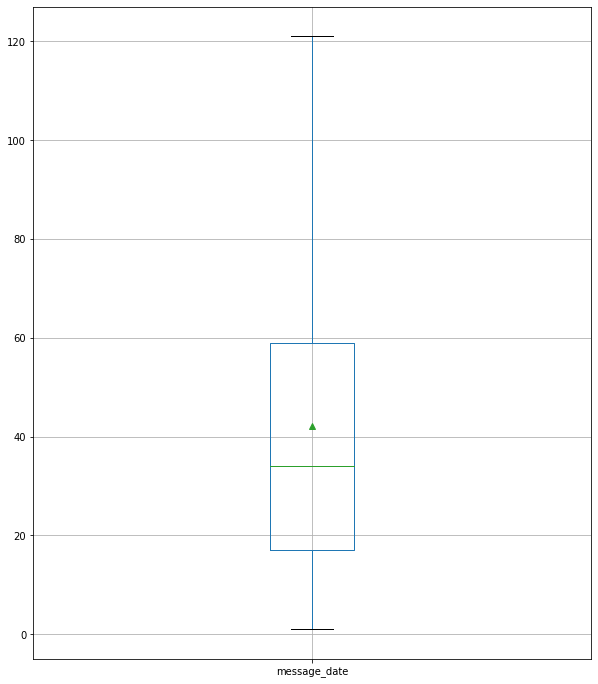

In [158]:
plt.figure(figsize = (10,12))
msg_count_pivot.boxplot(column='message_date', showmeans=True, showfliers=False)
plt.show()


In [159]:
Surf.describe()

,user_id,duration_x,call_date,duration_y,id_x,id_y,message_date,mb_used,age,surf_call_rev,ult_call_rev,surf_msg_rev,ult_msg_rev,surf_int_rev,ult_int_rev,total_surf_revenue,total_ult_revenue
count,1579.000000,1545.000000,1545.000000,1545.000000,1545.000000,1222.000000,1222.000000,1558.000000,1579.000000,1579.000000,1579.0,1579.000000,1579.0,1579.000000,1579.000000,1579.000000,1579.0
mean,1242.940469,436.519741,60.895793,60.895793,60.895793,40.109656,40.109656,16717.702137,44.382521,1.836764,0.0,0.209582,0.0,38451.079037,2052.469512,38473.125383,0.0
std,139.200115,229.283805,31.268044,31.268044,31.268044,33.035500,33.035500,7884.682983,16.669207,3.760291,0.0,0.583159,0.0,55155.535462,14412.729694,55156.336406,0.0
min,1001.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,92.310000,18.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,20.000000,0.0
25%,1120.000000,279.000000,40.000000,40.000000,40.000000,16.000000,16.000000,12187.955000,29.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,20.000000,0.0
50%,1245.000000,430.000000,60.000000,60.000000,60.000000,32.000000,32.000000,16923.830000,45.000000,0.000000,0.0,0.000000,0.0,18137.300000,0.000000,18158.300000,0.0
75%,1358.000000,579.000000,80.000000,80.000000,80.000000,54.000000,54.000000,21039.860000,60.000000,2.280000,0.0,0.000000,0.0,59930.750000,0.000000,59950.750000,0.0
max,1499.000000,1510.000000,205.000000,205.000000,205.000000,266.000000,266.000000,70931.590000,75.000000,30.300000,0.0,6.480000,0.0,559315.900000,286521.130000,559356.270000,0.0


In [160]:
Ult.describe()

,user_id,duration_x,call_date,duration_y,id_x,id_y,message_date,mb_used,age,surf_call_rev,ult_call_rev,surf_msg_rev,ult_msg_rev,surf_int_rev,ult_int_rev,total_surf_revenue,total_ult_revenue
count,724.000000,713.000000,713.000000,713.000000,713.000000,584.000000,584.000000,719.000000,724.000000,724.000000,724.0,724.000000,724.0,724.000000,724.000000,724.0,724.000000
mean,1253.356354,434.676017,61.221599,61.221599,61.221599,46.296233,46.296233,17238.642253,47.685083,1.912334,0.0,0.282265,0.0,41206.594613,2459.234682,0.0,2529.234682
std,150.941802,237.852123,32.855296,32.855296,32.855296,32.942118,32.942118,7831.018323,16.793440,4.064630,0.0,0.587648,0.0,57470.201299,11949.802309,0.0,11949.802309
min,1000.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,233.170000,18.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,70.000000
25%,1126.000000,263.000000,37.000000,37.000000,37.000000,21.000000,21.000000,12671.130000,34.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,70.000000
50%,1246.000000,425.000000,61.000000,61.000000,61.000000,41.000000,41.000000,16863.450000,48.000000,0.000000,0.0,0.000000,0.0,17967.400000,0.000000,0.0,70.000000
75%,1401.000000,566.000000,80.000000,80.000000,80.000000,66.000000,66.000000,21025.155000,64.000000,1.927500,0.0,0.307500,0.0,59666.625000,0.000000,0.0,70.000000
max,1497.000000,1369.000000,191.000000,191.000000,191.000000,166.000000,166.000000,46595.330000,75.000000,26.070000,0.0,3.480000,0.0,315953.300000,116167.310000,0.0,116237.310000


# Message Count 'Surf' #

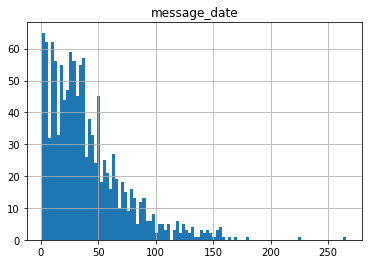

In [161]:


msg_month_surf = pd.pivot_table(final[final.plan == 'surf'], index=['month','user_id'], values='message_date').reset_index()
msg_month_surf.hist(column='message_date', bins=100)
plt.show()


# Message Count 'Ultimate' #

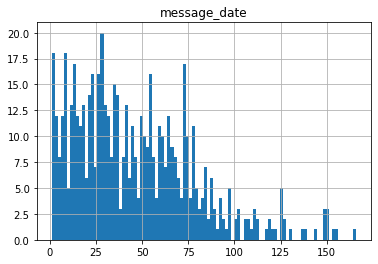

In [162]:


msg_month_ult = pd.pivot_table(final[final.plan == 'ultimate'], index=['month','user_id'], values='message_date').reset_index()
msg_month_ult.hist(column='message_date', bins=100)
plt.show()


# **Internet Data** #

**Analysis:** According to the internet data sample of the dataframe, the median and mean megabytes used is about 16873 and about 16882 megabytes used per month, respectively. ***In toto***, the mean megabytes used is greater than the median, which tends to indicate the data set is typified by a positive skew. Here, the outlier message count values tend to skew the data whereby the mean is greater than the median but overall the dataset is negatively skewed.  One standard deviation is σ7869.784848.


Here, there are 579 users under the "**Ultimate**" plan whose median and data usage is about 16867 and about  17251 megabytes per month, respectively; one standard deviation is σ7687.033067. Under the "**Surf**" plan, there are 1180 users whose median and data usage  is about 16869 and about 16629 megabytes used per month, respectively; one standrard deviation is σ7687.033067.

Consequently, the numbers tend to show that,  the median "Surf" plan users' data used is about  the same as the  "Ultimate" plan users' suage of data , though the outliers in "Surf" inflate the mean. As stated before, these differences may be de minimus because data samples that are more commensurate may yield even less variation in text messaging habits, given there are twice as many "Surf" users as "Ultimate" plan users.

# **Both Plans** #

In [163]:
internet_pivot.describe()

,user_id,mb_used
count,2277.000000,2277.000000
mean,1244.925780,16882.197501
std,142.544823,7869.784848
min,1000.000000,92.310000
25%,1121.000000,12347.720000
50%,1243.000000,16873.740000
75%,1367.000000,21041.520000
max,1499.000000,70931.590000


<AxesSubplot:xlabel='user_id', ylabel='mb_used'>

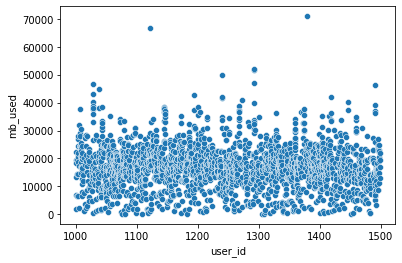

In [164]:
sns.scatterplot(data=internet_pivot, x='user_id', y='mb_used')

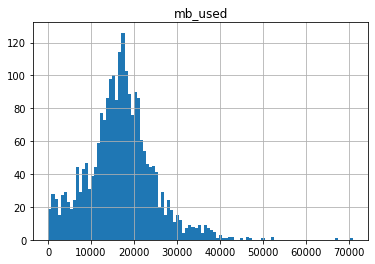

In [165]:
internet_pivot.hist(column='mb_used', bins=100)
plt.show()

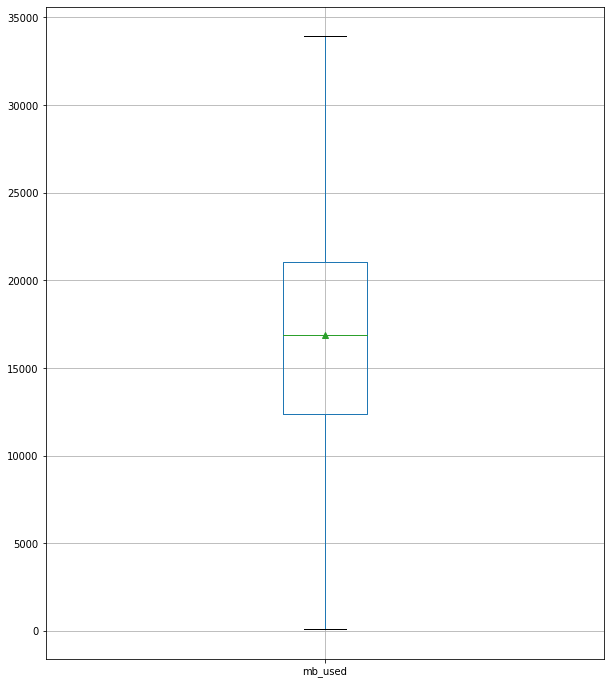

In [166]:
plt.figure(figsize = (10,12))
internet_pivot.boxplot(column='mb_used', showmeans=True, showfliers=False)
plt.show()


# Internet Data 'Ultimate' # 

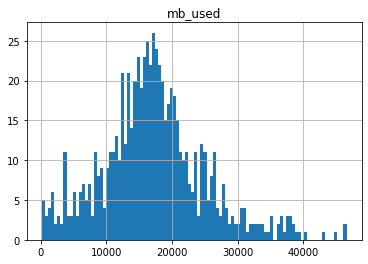

In [167]:


internet_month_ult = pd.pivot_table(final[final.plan == 'ultimate'], index=['month','user_id'], values='mb_used').reset_index()
internet_month_ult.hist(column='mb_used', bins=100)
plt.show()


# Internet Data 'Surf' # 

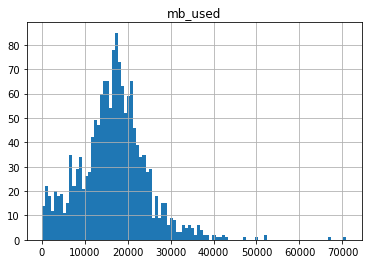

In [168]:


internet_month_surf = pd.pivot_table(final[final.plan == 'surf'], index=['month','user_id'], values='mb_used').reset_index()
internet_month_surf.hist(column='mb_used', bins=100)
plt.show()


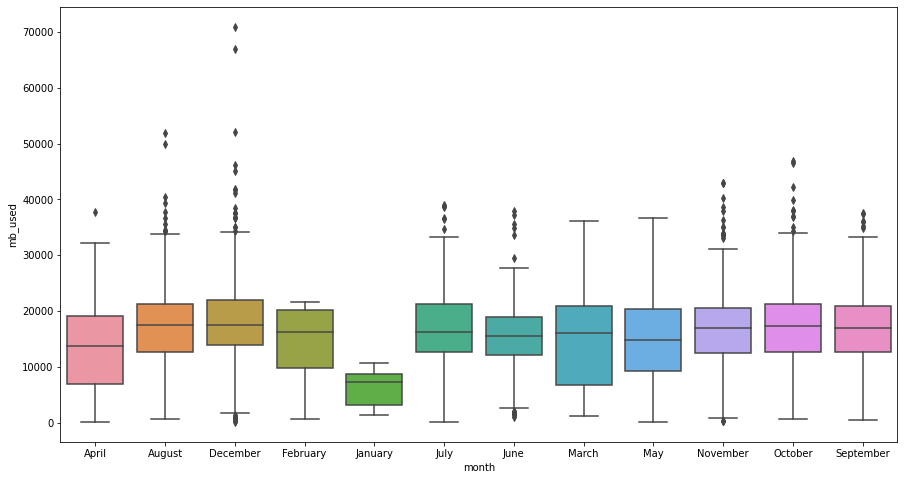

In [169]:
both = pd.concat((internet_month_ult, internet_month_surf))

plt.figure(figsize=(15,8))
sns.boxplot(x='month', y='mb_used', data=both)

plt.show()        
     

#### **Statistical Analysis** #

***H0*** = The average revenue from users of Ultimate and Surf calling plans are the same. 
***Ha*** = The average revenue from users of Ultimate and Surf calling plans differs.

***H0*** = The average revenue from users in the NY-NJ area and the rest of the US is the same.
***Ha*** = The average revenue from users in the NY-NJ area is different from that of the users from other regions.

In [170]:
alpha = 0.05# setting Alpha to 5%

In [171]:
from scipy.stats import levene #importing 'levene' for variance homogeniety comparison

**Here, the infinitesimal p-value of 1.6526638801696224e-127 may be due to unequal sample sizes whereby there are 579 'Surf' users and 1180 'Ultimate' users.**

In [172]:
len(Surf)

1579

In [173]:
len(Ult)

724

In [174]:
Surf_std = np.std(final.total_surf_revenue)
Ult_std = np.std(final.total_ult_revenue)

print(Surf_std)
print(Ult_std)
print()
print('The variance of Surf profit is:', np.var(final.total_surf_revenue))
print('The variance of Ultimate profit is:', np.var(final.total_ult_revenue))
print()
print('The revenue from Surf users is:', round(final.total_surf_revenue.sum()))
print('The revenue from Ultimate users is:', round(final.total_ult_revenue.sum()))
print(st.levene(final.total_surf_revenue, final.total_ult_revenue))

49026.02830652486
6797.685474709465

The variance of Surf profit is: 2403551451.5121765
The variance of Ultimate profit is: 46208527.81307604

The revenue from Surf users is: 60749065
The revenue from Ultimate users is: 1831166
LeveneResult(statistic=614.8298610449526, pvalue=1.6526638801696224e-127)


In [175]:
result_plans = st.ttest_ind(final.total_surf_revenue, final.total_ult_revenue, equal_var=False)
print()
print('p-value:', result_plans.pvalue)
print()
if result_plans.pvalue < alpha:    # alpha value is 0.05 or 5%
    print("We are accepting null hypothesis")
else:
    print("We are rejecting null hypothesis")


p-value: 5.152529983748698e-121

We are accepting null hypothesis


**Analysis**: Below, the NY Mean/Median is 29983.27/3789.81, which  diverge significanly, which significantly diveregs from the rest of the country's Mean/Median 26621.58/70.00.

***Calculation for total revenue***

In [176]:
final['total_revenue'] = final['total_surf_revenue'] + final['total_ult_revenue']

In [177]:
NY = final[final['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA '])]

NY.describe()

,user_id,duration_x,call_date,duration_y,id_x,id_y,message_date,mb_used,age,surf_call_rev,ult_call_rev,surf_msg_rev,ult_msg_rev,surf_int_rev,ult_int_rev,total_surf_revenue,total_ult_revenue,total_revenue
count,378.000000,371.000000,378.000000,371.000000,371.000000,285.000000,285.000000,376.000000,378.000000,378.000000,378.0,378.000000,378.0,378.000000,378.000000,378.000000,378.000000,378.00000
mean,1211.846561,437.212938,59.507937,60.630728,60.630728,35.329825,35.329825,16861.504681,44.502646,1.549127,0.0,0.132143,0.0,38213.754497,1780.699444,29021.909656,961.368704,29983.27836
std,141.974305,203.496067,28.024642,27.055119,27.055119,26.789279,26.789279,7474.611629,15.924099,2.973106,0.0,0.368478,0.0,52974.552151,8893.431309,44525.139638,6661.482065,44394.97581
min,1014.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,290.060000,18.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,20.00000
25%,1099.000000,301.000000,39.000000,41.000000,41.000000,13.000000,13.000000,12366.410000,29.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,20.000000,0.000000,20.48750
50%,1176.000000,451.000000,62.000000,63.000000,63.000000,31.000000,31.000000,16735.780000,46.000000,0.000000,0.0,0.000000,0.0,17053.850000,0.000000,1375.785000,0.000000,3789.81000
75%,1300.000000,571.500000,78.000000,78.000000,78.000000,49.000000,49.000000,20879.837500,55.000000,2.055000,0.0,0.000000,0.0,58419.675000,0.000000,45114.082500,0.000000,48878.26000
max,1498.000000,1167.000000,150.000000,150.000000,150.000000,126.000000,126.000000,41924.690000,75.000000,20.010000,0.0,2.280000,0.0,269246.900000,83472.830000,269266.900000,60157.720000,269266.90000


In [178]:
len(final.query('plan == "surf" & city != "New York-Newark-Jersey City, NY-NJ-PA "'))

1267

In [179]:
len(final.query('plan == "ultimate" & city != "New York-Newark-Jersey City, NY-NJ-PA "'))

658

In [180]:
len(final.query('plan == "surf" & city == "New York-Newark-Jersey City, NY-NJ-PA "'))

312

In [181]:
len(final.query('plan == "ultimate" & city == "New York-Newark-Jersey City, NY-NJ-PA "'))

66

In [182]:
rest_frame = final[~final['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA '])]

rest_frame.describe()

,user_id,duration_x,call_date,duration_y,id_x,id_y,message_date,mb_used,age,surf_call_rev,ult_call_rev,surf_msg_rev,ult_msg_rev,surf_int_rev,ult_int_rev,total_surf_revenue,total_ult_revenue,total_revenue
count,1925.000000,1887.000000,1925.000000,1887.000000,1887.000000,1521.000000,1521.000000,1901.000000,1925.000000,1925.000000,1925.0,1925.000000,1925.0,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,1252.963636,435.686804,59.865455,61.071012,61.071012,43.380671,43.380671,16886.290347,45.601039,1.921668,0.0,0.252125,0.0,39534.041091,2258.821236,25859.108119,762.477164,26621.585283
std,142.317873,237.217370,33.399134,32.623828,32.623828,34.036963,34.036963,7947.502152,16.935146,4.006490,0.0,0.617316,0.0,56462.182591,14440.850823,49868.957035,6827.098252,49940.641682
min,1000.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,92.310000,18.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1132.000000,272.000000,37.000000,39.000000,39.000000,18.000000,18.000000,12347.720000,30.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,27.710000
50%,1254.000000,424.000000,59.000000,60.000000,60.000000,35.000000,35.000000,16922.130000,46.000000,0.000000,0.0,0.000000,0.0,18138.300000,0.000000,20.000000,0.000000,70.000000
75%,1374.000000,576.000000,80.000000,80.000000,80.000000,61.000000,61.000000,21046.140000,61.000000,2.160000,0.0,0.090000,0.0,59996.100000,0.000000,35515.700000,70.000000,38237.810000
max,1499.000000,1510.000000,205.000000,205.000000,205.000000,266.000000,266.000000,70931.590000,75.000000,30.300000,0.0,6.480000,0.0,559315.900000,286521.130000,559356.270000,116237.310000,559356.270000


In [183]:
rest_frame.age.median()

46.0

In [184]:
rest_frame.mb_used.median()

16922.13

In [185]:
rest_frame.duration_x.median()

424.0

In [186]:
print("Total revenue in NY-NJ, with oultiers:", round(NY.total_revenue.sum(), 2))
print()
print("Total revenue in the US, save NY-NJ, with oultiers:", round(rest_frame.total_revenue.sum(), 2))

Total revenue in NY-NJ, with oultiers: 11333679.22

Total revenue in the US, save NY-NJ, with oultiers: 51246551.67


#### **Getting Rid of Profit Outlier Values Outside 3σ**

**Analysis**: Even with outliers within 3σ removed, the median/mean is still $2260.86/22967.16 in the NY area contra the rest of the US.

In [189]:


N_Q1 = NY.quantile(0.25)
N_Q3 = NY.quantile(0.75)
N_IQR = N_Q3 - N_Q1

New_NY = NY[~((NY < (N_Q1 - 1.5 * N_IQR)) | (NY > (N_Q3 + 1.5 * N_IQR))).any(axis=1)]

New_NY.describe()



,user_id,duration_x,call_date,duration_y,id_x,id_y,message_date,mb_used,age,surf_call_rev,ult_call_rev,surf_msg_rev,ult_msg_rev,surf_int_rev,ult_int_rev,total_surf_revenue,total_ult_revenue,total_revenue
count,232.000000,231.000000,232.000000,231.000000,231.000000,157.000000,157.000000,232.000000,232.000000,232.000000,232.0,232.0,232.0,232.000000,232.0,232.000000,232.0,232.000000
mean,1220.375000,387.584416,54.068966,54.303030,54.303030,22.993631,22.993631,14785.373017,43.150862,0.592500,0.0,0.0,0.0,22946.573276,0.0,22967.165776,0.0,22967.165776
std,153.026189,162.031104,22.436143,22.199176,22.199176,14.649099,14.649099,5941.904826,16.334666,1.153646,0.0,0.0,0.0,30025.861288,0.0,30026.048186,0.0,30026.048186
min,1014.000000,7.000000,0.000000,2.000000,2.000000,1.000000,1.000000,599.780000,18.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,20.000000,0.0,20.000000
25%,1077.000000,289.500000,39.000000,39.000000,39.000000,10.000000,10.000000,11028.222500,29.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,20.000000,0.0,20.000000
50%,1181.000000,407.000000,58.000000,58.000000,58.000000,21.000000,21.000000,15223.960000,46.000000,0.000000,0.0,0.0,0.0,2239.600000,0.0,2260.865000,0.0,2260.865000
75%,1358.000000,514.000000,73.000000,73.000000,73.000000,35.000000,35.000000,19089.830000,52.000000,0.420000,0.0,0.0,0.0,40898.300000,0.0,40918.300000,0.0,40918.300000
max,1498.000000,668.000000,103.000000,103.000000,103.000000,50.000000,50.000000,25340.640000,75.000000,5.040000,0.0,0.0,0.0,103406.400000,0.0,103428.350000,0.0,103428.350000


In [202]:
R_Q1 = rest_frame.quantile(0.25)
R_Q3 = rest_frame.quantile(0.75)
R_IQR = R_Q3 - R_Q1

New_R = rest_frame[~((rest_frame < (R_Q1 - 1.5 * R_IQR)) | (rest_frame > (R_Q3 + 1.5 * R_IQR))).any(axis=1)]

New_R.describe()

,user_id,duration_x,call_date,duration_y,id_x,id_y,message_date,mb_used,age,surf_call_rev,ult_call_rev,surf_msg_rev,ult_msg_rev,surf_int_rev,ult_int_rev,total_surf_revenue,total_ult_revenue,total_revenue
count,1245.000000,1217.000000,1245.000000,1217.000000,1217.000000,911.000000,911.000000,1229.000000,1245.000000,1245.000000,1245.0,1245.000000,1245.0,1245.000000,1245.0,1245.000000,1245.000000,1245.000000
mean,1252.217671,360.792933,49.649799,50.792112,50.792112,25.574094,25.574094,14420.570944,45.531727,0.572313,0.0,0.005880,0.0,21993.818153,0.0,13046.872353,24.008032,13070.880386
std,143.119860,175.085087,25.195909,24.318379,24.318379,15.623269,15.623269,6238.038662,16.710174,1.275328,0.0,0.027616,0.0,29670.486289,0.0,22936.437936,33.242507,22922.790563
min,1000.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,92.310000,18.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,20.000000
25%,1138.000000,229.000000,30.000000,32.000000,32.000000,12.000000,12.000000,10185.720000,30.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,20.000000
50%,1246.000000,382.000000,52.000000,53.000000,53.000000,25.000000,25.000000,15401.480000,46.000000,0.000000,0.0,0.000000,0.0,2665.300000,0.0,20.000000,0.000000,70.000000
75%,1383.000000,496.000000,69.000000,70.000000,70.000000,37.000000,37.000000,18977.180000,60.000000,0.000000,0.0,0.000000,0.0,39147.400000,0.0,20536.400000,70.000000,20536.400000
max,1499.000000,680.000000,103.000000,103.000000,103.000000,57.000000,57.000000,29968.060000,75.000000,5.400000,0.0,0.210000,0.0,149680.600000,0.0,87806.700000,70.000000,87806.700000


In [205]:
print('The total profit from the NY-NJ region without outliers is:', round(New_NY['total_revenue'].sum()))

print('The total profit from the US, excluding the NY-NJ region without outlier is:', round(New_R['total_revenue'].sum()))

The total profit from the NY-NJ region without outliers is: 5328382
The total profit from the US, excluding the NY-NJ region without outlier is: 16273246


In [206]:
Surf

,user_id,month,duration_x,call_date,duration_y,id_x,id_y,message_date,mb_used,first_name,...,plan,churn_date,surf_call_rev,ult_call_rev,surf_msg_rev,ult_msg_rev,surf_int_rev,ult_int_rev,total_surf_revenue,total_ult_revenue
1,1001,August,182.0,27.0,27.0,27.0,30.0,30.0,6919.15,Mickey,...,surf,Active,0.0,0.0,0.00,0.0,0.0,0.0,20.00,0.0
2,1001,December,412.0,56.0,56.0,56.0,44.0,44.0,19369.18,Mickey,...,surf,Active,0.0,0.0,0.00,0.0,43691.8,0.0,43711.80,0.0
3,1001,November,426.0,64.0,64.0,64.0,36.0,36.0,18504.30,Mickey,...,surf,Active,0.0,0.0,0.00,0.0,35043.0,0.0,35063.00,0.0
4,1001,October,393.0,65.0,65.0,65.0,53.0,53.0,22330.49,Mickey,...,surf,Active,0.0,0.0,0.09,0.0,73304.9,0.0,73324.99,0.0
5,1001,September,315.0,49.0,49.0,49.0,44.0,44.0,13314.82,Mickey,...,surf,Active,0.0,0.0,0.00,0.0,0.0,0.0,20.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,1143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lorina,...,surf,Active,0.0,0.0,0.00,0.0,0.0,0.0,20.00,0.0
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kristopher,...,surf,Active,0.0,0.0,0.00,0.0,0.0,0.0,20.00,0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eliseo,...,surf,Active,0.0,0.0,0.00,0.0,0.0,0.0,20.00,0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mckinley,...,surf,Active,0.0,0.0,0.00,0.0,0.0,0.0,20.00,0.0


In [207]:
Surf_avg_rev = np.mean(Surf.total_surf_revenue)
Surf_avg_rev

38473.12538315389

In [208]:
Ult

,user_id,month,duration_x,call_date,duration_y,id_x,id_y,message_date,mb_used,first_name,...,plan,churn_date,surf_call_rev,ult_call_rev,surf_msg_rev,ult_msg_rev,surf_int_rev,ult_int_rev,total_surf_revenue,total_ult_revenue
0,1000,December,124.0,16.0,16.0,16.0,11.0,11.0,1901.47,Anamaria,...,ultimate,Active,0.00,0.0,0.00,0.0,0.0,0.00,0.0,70.00
19,1006,December,59.0,9.0,9.0,9.0,139.0,139.0,32118.82,Jesusa,...,ultimate,2018-12-18,0.00,0.0,2.67,0.0,171188.2,14831.74,0.0,14901.74
20,1006,November,10.0,2.0,2.0,2.0,15.0,15.0,2068.37,Jesusa,...,ultimate,2018-12-18,0.00,0.0,0.00,0.0,0.0,0.00,0.0,70.00
26,1008,December,634.0,85.0,85.0,85.0,26.0,26.0,14689.33,Emely,...,ultimate,Active,4.02,0.0,0.00,0.0,0.0,0.00,0.0,70.00
27,1008,November,446.0,63.0,63.0,63.0,37.0,37.0,23676.72,Emely,...,ultimate,Active,0.00,0.0,0.00,0.0,86767.2,0.00,0.0,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,1108,December,NaN,NaN,NaN,NaN,NaN,NaN,233.17,Porfirio,...,ultimate,Active,0.00,0.0,0.00,0.0,0.0,0.00,0.0,70.00
2293,1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jess,...,ultimate,Active,0.00,0.0,0.00,0.0,0.0,0.00,0.0,70.00
2296,1269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Irving,...,ultimate,2018-12-15,0.00,0.0,0.00,0.0,0.0,0.00,0.0,70.00
2297,1275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elvie,...,ultimate,Active,0.00,0.0,0.00,0.0,0.0,0.00,0.0,70.00


In [209]:
Ult_avg_rev = np.mean(Ult.total_ult_revenue)
Ult_avg_rev

2529.2346823204425

In [210]:
ttest = st.ttest_rel(Surf_avg_rev, Ult_avg_rev)

print('p-value: ', ttest.pvalue)

print(round(Surf.total_surf_revenue.mean()))
print(round(Ult.total_ult_revenue.mean()))


print(ttest.pvalue)
if ttest.pvalue < alpha:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

p-value:  nan
38473
2529
nan
We are accepting null hypothesis


#### ***New York vs Rest of Country T-Tests without Outliers***  

In [212]:
print('The variance of Surf profit is:', np.var(New_NY.total_revenue))
print('The variance of Ultimate profit is:', np.var(New_R.total_revenue))
print()
print(st.levene(New_NY.total_revenue, New_R.total_revenue))#p-value 1.012435900833066e-08 for Hypothesis on the Equality of Two Population Means

The variance of Surf profit is: 897677519.7965995
The variance of Ultimate profit is: 525032275.52574897

LeveneResult(statistic=33.1963807730786, pvalue=1.012435900833066e-08)


In [213]:
New_NY

,user_id,month,duration_x,call_date,duration_y,id_x,id_y,message_date,mb_used,first_name,...,churn_date,surf_call_rev,ult_call_rev,surf_msg_rev,ult_msg_rev,surf_int_rev,ult_int_rev,total_surf_revenue,total_ult_revenue,total_revenue
57,1014,November,163.0,28.0,28.0,28.0,9.0,9.0,1175.59,Edmundo,...,Active,0.00,0.0,0.0,0.0,0.0,0.0,20.00,0.0,20.00
75,1022,August,631.0,80.0,80.0,80.0,NaN,NaN,21325.33,Bo,...,2018-09-07,3.93,0.0,0.0,0.0,63253.3,0.0,63277.23,0.0,63277.23
76,1022,December,585.0,82.0,82.0,82.0,NaN,NaN,18283.62,Bo,...,2018-09-07,2.55,0.0,0.0,0.0,32836.2,0.0,32858.75,0.0,32858.75
77,1022,July,475.0,70.0,70.0,70.0,NaN,NaN,9933.15,Bo,...,2018-09-07,0.00,0.0,0.0,0.0,0.0,0.0,20.00,0.0,20.00
78,1022,June,490.0,76.0,76.0,76.0,NaN,NaN,23436.48,Bo,...,2018-09-07,0.00,0.0,0.0,0.0,84364.8,0.0,84384.80,0.0,84384.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,1498,May,288.0,35.0,35.0,35.0,NaN,NaN,22462.17,Scot,...,Active,0.00,0.0,0.0,0.0,74621.7,0.0,74641.70,0.0,74641.70
2256,1498,November,223.0,41.0,41.0,41.0,NaN,NaN,19168.55,Scot,...,Active,0.00,0.0,0.0,0.0,41685.5,0.0,41705.50,0.0,41705.50
2257,1498,October,298.0,46.0,46.0,46.0,NaN,NaN,20580.76,Scot,...,Active,0.00,0.0,0.0,0.0,55807.6,0.0,55827.60,0.0,55827.60
2258,1498,September,363.0,45.0,45.0,45.0,NaN,NaN,22827.28,Scot,...,Active,0.00,0.0,0.0,0.0,78272.8,0.0,78292.80,0.0,78292.80


In [214]:
NY_avg_rev = np.mean(New_NY.total_revenue)

Rest_avg_rev = np.mean(New_R.total_revenue)

#### ***Printing μ / σ / σ2 for NY/US dataframes without outliers***

In [215]:
print(New_NY.mean())
print(New_NY.std())
print(New_NY.var())
print()
print(New_R.mean())
print(New_R.std())
print(New_R.var())
print()

user_id                1220.375000
duration_x              387.584416
call_date                54.068966
duration_y               54.303030
id_x                     54.303030
id_y                     22.993631
message_date             22.993631
mb_used               14785.373017
age                      43.150862
surf_call_rev             0.592500
ult_call_rev              0.000000
surf_msg_rev              0.000000
ult_msg_rev               0.000000
surf_int_rev          22946.573276
ult_int_rev               0.000000
total_surf_revenue    22967.165776
total_ult_revenue         0.000000
total_revenue         22967.165776
dtype: float64
user_id                 153.026189
duration_x              162.031104
call_date                22.436143
duration_y               22.199176
id_x                     22.199176
id_y                     14.649099
message_date             14.649099
mb_used                5941.904826
age                      16.334666
surf_call_rev             1.153646
ult_c

#### ***T-Test to confirm the  P-Value***

In [216]:
result = st.ttest_ind(New_NY.total_revenue, New_R.total_revenue, equal_var=False)
print()
print('p-value:', result.pvalue)
print(result)
if result.pvalue < alpha:    # alpha value is 0.05 or 5%
    print("We are accepting null hypothesis")
else:
    print("We are rejecting null hypothesis")


p-value: 2.981138683314496e-06
Ttest_indResult(statistic=4.767923138450476, pvalue=2.981138683314496e-06)
We are accepting null hypothesis


#### Conclusion #

# The average revenue from users of Ultimate and Surf calling plans differs. #
There are differences between revenue derived from the 'Surf' and 'Ultimate' plans because of diference in total revenue 60749065 USD and 1831166 USD, and medians of 14913.50 USD and 70.00 USD, respectively.

The Levene Test of the population means yields a p-value of 3.96909725906304e-62, but the Levene Test is used for poulations of equal variances. Here, when setting the parameter of "equal variances" to "False," the results is a p-value of 5.152529983748698e-121. Still, this evidences markedly low equality of two population means. Consequently, the null hypothesis has been negated, and tends to show that there are significant differneces between revenue derived from  users of the 'Surf' and 'Ultimate' plans. That is, The p-value tells us that although the average revenue for the two plans are different, there is less than 1% probability of randomly getting a difference of comparable size, and tends to validate the statistical findings. Thus, this probability is low enough to conclude that there is a significant difference between the average amounts spent.

That there are twice as many Surf users as Ultimate users may influence the magnitude of differences between the plans, but likely does not warrant discarding the premise that the plans differ in revenue produced because one can speculate with reasonable certainty that users will tend to prefer a cheaper plan on its face, even though there are greater charges that may be potentially incurred by going over a plan's limits.

# The average revenue from users in NY-NJ area is different from that of the users from other regions. #

The hypothesis that the Company, on average, is different from the rest of the US is valid because the Company derives  more revenue  from  NY-NJ per user than the rest of the US: 

The total profit from the NY-NJ region without outliers is: 5328382.00 USD
The total profit from the US, excluding the NY-NJ regionm without outlier is: 16273246.00 USD

The median/mean revenue in NY-NJ, without oultiers is $2260.86 / 22967.00 USD;
The median/mean revenue in the US, save NY-NJ, without oultiers is 70.00 / 13070.880386. 
The p-value of 2.981138683314496e-06 indicates that the difference between the means is likely not random.

Surf plan and rest of the US 1267 Users; Ultimate plan and rest of the US 658 Users
Surf plan in NY 312 Users; Ultimate plan and NY 66 Users
NY
Median age of 46
16735.78mb used
451.0 minutes of call time
31 messages

The rest of the US 
Median age of 46. 
16922.13mb used per month.
424 minutes of call time per month.
35 messages per month.	

Absent outlier values, the total profit from the NY-NJ region is 3453893.79 USD; and, the total profit from the US, excluding the 
NY-NJ region, is 15164312.030000001 USD.

Upon analyzing the data the numbers may reasonbaly contextualized by highlight that in NY there are 5 times as many SUrf users as Ultimate user; whereas, in the rest of the US it's closer 2 to 1 ratio. THe difference in data usage between NY and the rest of the country is de minimus; and, this is sigiifcant  becuase the penalty inucrred for going over data limits is substantial  Moreover, this may explain some outlier values and higher revenue.   
 

The foregoing analysis tends to show that there are significant disparities between Users in the respective geographic loci.



